In [25]:
import numpy as np 
import pandas as pd 
import math 
from sklearn import datasets, model_selection, naive_bayes
from sklearn import svm
from sklearn import metrics
from sklearn.metrics import precision_score

from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
%matplotlib inline
from sklearn.calibration import CalibratedClassifierCV
from sklearn.svm import LinearSVC

Load datasets:

In [26]:
WildFiresData = pd.read_csv('Historical_Wildfires.csv')
HistoricalWeather = pd.read_csv('HistoricalWeather.csv')
HistoricalWeather = HistoricalWeather.rename(columns={"count()[unit: km^2]": "Area", "min()": "Min", "max()": "Max", "mean()": "Mean", "variance()": "Variance"})

Create train data and labels(it takes 7-10 minutes):

In [27]:
data_train = []
data_train_SoilPer = []
data_train_SolarPer = []
data_train_SolarSoil = []
data_train_Per = []
data_train_Soil = []
data_train_Solar = []
data_train_Empty = []
label_train = []
number_emptydata = 0
HistoricalWeather['Date'] = pd.to_datetime(HistoricalWeather['Date'])
WildFiresData['Date'] = pd.to_datetime(WildFiresData['Date'])

for i in range(len(WildFiresData)):    
    dateoffire = WildFiresData['Date'].iloc[i]
    region = WildFiresData['Region'].iloc[i]
    matchdate = HistoricalWeather[HistoricalWeather['Date'] == dateoffire]
    final_matcheddate = matchdate[matchdate['Region'] == region]
    try:
        Precipitation = final_matcheddate[final_matcheddate['Parameter'] == 'Precipitation']['Mean'].iloc[0]
        RelativeHumidity = final_matcheddate[final_matcheddate['Parameter'] == 'RelativeHumidity']['Mean'].iloc[0]
        SoilWaterContent = final_matcheddate[final_matcheddate['Parameter'] == 'SoilWaterContent']['Mean'].iloc[0]
        SolarRadiation = final_matcheddate[final_matcheddate['Parameter'] == 'SolarRadiation']['Mean'].iloc[0]
        Temperature = final_matcheddate[final_matcheddate['Parameter'] == 'Temperature']['Mean'].iloc[0]
        WindSpeed = final_matcheddate[final_matcheddate['Parameter'] == 'WindSpeed']['Mean'].iloc[0]
        data_train.append([Precipitation, RelativeHumidity, SoilWaterContent, SolarRadiation, Temperature, WindSpeed])
        data_train_SoilPer.append([RelativeHumidity, SolarRadiation, Temperature, WindSpeed])
        data_train_SolarPer.append([RelativeHumidity, SoilWaterContent, Temperature, WindSpeed])
        data_train_SolarSoil.append([Precipitation, RelativeHumidity, Temperature, WindSpeed])
        data_train_Per.append([RelativeHumidity, SoilWaterContent, SolarRadiation, Temperature, WindSpeed])
        data_train_Soil.append([Precipitation, RelativeHumidity, SolarRadiation, Temperature, WindSpeed])
        data_train_Solar.append([Precipitation, RelativeHumidity, SoilWaterContent, Temperature, WindSpeed])
        data_train_Empty.append([RelativeHumidity, Temperature, WindSpeed])
        label_train.append(1)
    except:
        number_emptydata += 1 
    try:
        allregion = matchdate['Region'].drop_duplicates().values
        allregion = np.delete(allregion, np.where(allregion == region))
        for tempregion in allregion:
            final_matchedlabeldate = matchdate[matchdate['Region'] == tempregion]
            Precipitation = final_matchedlabeldate[final_matchedlabeldate['Parameter'] == 'Precipitation']['Mean'].iloc[0]
            RelativeHumidity = final_matchedlabeldate[final_matchedlabeldate['Parameter'] == 'RelativeHumidity']['Mean'].iloc[0]
            SoilWaterContent = final_matchedlabeldate[final_matchedlabeldate['Parameter'] == 'SoilWaterContent']['Mean'].iloc[0]
            SolarRadiation = final_matchedlabeldate[final_matchedlabeldate['Parameter'] == 'SolarRadiation']['Mean'].iloc[0]
            Temperature = final_matchedlabeldate[final_matchedlabeldate['Parameter'] == 'Temperature']['Mean'].iloc[0]
            WindSpeed = final_matchedlabeldate[final_matchedlabeldate['Parameter'] == 'WindSpeed']['Mean'].iloc[0]
            data_train.append([Precipitation, RelativeHumidity, SoilWaterContent, SolarRadiation, Temperature, WindSpeed])
            data_train_SoilPer.append([RelativeHumidity, SolarRadiation, Temperature, WindSpeed])
            data_train_SolarPer.append([RelativeHumidity, SoilWaterContent, Temperature, WindSpeed])
            data_train_SolarSoil.append([Precipitation, RelativeHumidity, Temperature, WindSpeed])
            data_train_Per.append([RelativeHumidity, SoilWaterContent, SolarRadiation, Temperature, WindSpeed])
            data_train_Soil.append([Precipitation, RelativeHumidity, SolarRadiation, Temperature, WindSpeed])
            data_train_Solar.append([Precipitation, RelativeHumidity, SoilWaterContent, Temperature, WindSpeed])
            data_train_Empty.append([RelativeHumidity, Temperature, WindSpeed])
            label_train.append(0)
            
    except:  
        number_emptydata += 1 

Use Machine Learning with trained data and labels to predict wildfire:

In [28]:
def choosingmachine(Existence_list, Precipitation, RelativeHumidity, SoilWaterContent, SolarRadiation, Temperature, WindSpeed):    
    clf_svc = LinearSVC()
    clf = CalibratedClassifierCV(clf_svc)
    X_train_SoilPer, X_test_SoilPer, y_train_SoilPer, y_test_SoilPer = train_test_split(data_train_SoilPer, label_train, test_size = 0.3)
    X_train_SolarPer, X_test_SolarPer, y_train_SolarPer, y_test_SolarPer = train_test_split(data_train_SolarPer, label_train, test_size = 0.3)
    X_train_SolarSoil, X_test_SolarSoil, y_train_SolarSoil, y_test_SolarSoil = train_test_split(data_train_SolarSoil, label_train, test_size = 0.3)
    X_train_Per, X_test_Per, y_train_Per, y_test_Per = train_test_split(data_train_Per, label_train, test_size = 0.3)
    X_train_Soil, X_test_Soil, y_train_Soil, y_test_Soil = train_test_split(data_train_Soil, label_train, test_size = 0.3)
    X_train_Solar, X_test_Solar, y_train_Solar, y_test_Solar = train_test_split(data_train_Solar, label_train, test_size = 0.3)
    X_train_Empty, X_test_Empty, y_train_Empty, y_test_Empty = train_test_split(data_train_Empty, label_train, test_size = 0.3)
    X_train, X_test, y_train, y_test = train_test_split(data_train, label_train, test_size = 0.3)
    
    if Existence_list == ['Yes','No','No']:
        scaling = MinMaxScaler(feature_range = (-1,1)).fit(X_train_SoilPer)
        X_train_SoilPer = scaling.transform(X_train_SoilPer)
        X_test_SoilPer = scaling.transform(X_test_SoilPer)
        interedData = scaling.transform([[RelativeHumidity, SolarRadiation, Temperature, WindSpeed]])
        X = X_train_SoilPer
        y = y_train_SoilPer
        clf.fit(X, y)
        predictML = round(clf.predict_proba(interedData)[0][1]*100,2)
        accuracyML = round(metrics.accuracy_score(y_test_SoilPer, clf.predict(X_test_SoilPer))*100, 2)
            
    elif Existence_list == ['No','Yes','No']:
        scaling = MinMaxScaler(feature_range = (-1,1)).fit(X_train_SolarPer)
        X_train_SolarPer = scaling.transform(X_train_SolarPer)
        X_test_SolarPer = scaling.transform(X_test_SolarPer)
        interedData = scaling.transform([[RelativeHumidity, SoilWaterContent, Temperature, WindSpeed]])
        X = X_train_SolarPer
        y = y_train_SolarPer                   
        clf.fit(X, y)
        predictML = round(clf.predict_proba(interedData)[0][1]*100,2)
        accuracyML = round(metrics.accuracy_score(y_test_SolarPer, clf.predict(X_test_SolarPer))*100, 2)
        
    elif Existence_list == ['No','No','Yes']:
        scaling = MinMaxScaler(feature_range = (-1,1)).fit(X_train_SolarSoil)
        X_train_SolarSoil = scaling.transform(X_train_SolarSoil)
        X_test_SolarSoil = scaling.transform(X_test_SolarSoil)
        interedData = scaling.transform([[Precipitation, RelativeHumidity, Temperature, WindSpeed]])                   
        X = X_train_SolarSoil
        y = y_train_SolarSoil
        clf.fit(X, y)
        predictML = round(clf.predict_proba(interedData)[0][1]*100,2)
        accuracyML = round(metrics.accuracy_score(y_test_SolarSoil, clf.predict(X_test_SolarSoil))*100, 2)
        
    elif Existence_list == ['Yes','Yes','No']:
        scaling = MinMaxScaler(feature_range = (-1,1)).fit(X_train_Per)
        X_train_Per = scaling.transform(X_train_Per)
        X_test_Per = scaling.transform(X_test_Per)
        interedData = scaling.transform([[RelativeHumidity, SoilWaterContent, SolarRadiation, Temperature, WindSpeed]])    
        X = X_train_Per
        y = X_test_Per
        clf.fit(X, y)
        predictML = round(clf.predict_proba(interedData)[0][1]*100,2)
        accuracyML = round(metrics.accuracy_score(y_test_Per, clf.predict(X_test_Per))*100, 2)
        
    elif Existence_list == ['Yes','No','Yes']:
        scaling = MinMaxScaler(feature_range = (-1,1)).fit(X_train_Soil)
        X_train_Soil = scaling.transform(X_train_Soil)
        X_test_Soil = scaling.transform(X_test_Soil)
        interedData = scaling.transform([[Precipitation, RelativeHumidity, SolarRadiation, Temperature, WindSpeed]])    
        X = X_train_Soil 
        y = y_train_Soil
        clf.fit(X, y)
        predictML = round(clf.predict_proba(interedData)[0][1]*100,2)
        accuracyML = round(metrics.accuracy_score(y_test_Soil, clf.predict(X_test_Soil))*100, 2)
        
    elif Existence_list == ['No','Yes','Yes']:
        scaling = MinMaxScaler(feature_range = (-1,1)).fit(X_train_Solar)
        X_train_Solar = scaling.transform(X_train_Solar)
        X_test_Solar = scaling.transform(X_test_Solar)
        interedData = scaling.transform([[Precipitation, RelativeHumidity, SoilWaterContent, Temperature, WindSpeed]])    
        X = X_train_Solar
        y = y_train_Solar
        clf.fit(X, y)
        predictML = round(clf.predict_proba(interedData)[0][1]*100,2)
        accuracyML = round(metrics.accuracy_score(y_test_Solar, clf.predict(X_test_Solar))*100, 2)
    
    elif Existence_list == ['No', 'No', 'No']:
        scaling = MinMaxScaler(feature_range = (-1,1)).fit(X_train_Empty)
        X_train_Empty = scaling.transform(X_train_Empty)
        X_test_Empty = scaling.transform(X_test_Empty)
        interedData = scaling.transform([[RelativeHumidity, Temperature, WindSpeed]])  
        X = X_train_Empty
        y = y_train_Empty
        clf.fit(X, y)
        predictML = round(clf.predict_proba(interedData)[0][1]*100,2)
        accuracyML = round(metrics.accuracy_score(y_test_Empty, clf.predict(X_test_Empty))*100, 2) 
        
    else:
        scaling = MinMaxScaler(feature_range = (-1,1)).fit(X_train)
        X_train = scaling.transform(X_train)
        X_test = scaling.transform(X_test)
        interedData = scaling.transform([[Precipitation, RelativeHumidity, SoilWaterContent, SolarRadiation, Temperature, WindSpeed]])   
        X = X_train
        y = y_train
        clf.fit(X, y)
        predictML = round(clf.predict_proba(interedData)[0][1]*100,2)
        accuracyML = round(metrics.accuracy_score(y_test, clf.predict(X_test))*100, 2)
    return [accuracyML, predictML] 

FFWI formula to predict fire index: 

In [29]:
def FFWIformula(windavr, tempavr, havr):
    tempavr = (tempavr * (9/5)) + 32
    windavr = windavr/0.44704
    if havr < 10:
        m = 0.03229 + (0.281073 * havr)-(0.000578 * havr * tempavr)
    elif 10 <= havr <= 50:
        m = 2.22749 + (0.160107 * havr) - (0.01478 * tempavr)
    elif havr > 50:
        m = 21.0606 + (0.005565 * havr**2) - (0.00035 * havr * tempavr) - (0.483199 * havr)
    n = 1 - (2 * (m/30)) + (1.5 * (m/30)**2) - (0.5 * (m/30)**3)
    FFWI = n * (math.sqrt(1 + windavr**2)/0.3002)
    return round(FFWI, 2)

The function to find average probability:

In [30]:
def AverageProb():
    averageProb = (choosingmachine(Existence_list, Precipitation, RelativeHumidity, SoilWaterContent, SolarRadiation, Temperature, WindSpeed)[1] + FFWIformula(WindSpeed, Temperature, RelativeHumidity))/2
    if averageProb < 50:
        dangerlavel = 'Low'
    elif 50 <= averageProb < 70:
        dangerlavel = 'Medium'
    elif 70 <= averageProb < 90:
        dangerlavel = 'High (dangerous!)'
    elif 90 <= averageProb <= 100:
        dangerlavel = 'Extreme (Very dangerous!)'
    elif 101 <= averageProb:
        dangerlavel = 'Very Extreme (Extremely dangerous!)'
    return dangerlavel

The function to ask weather parameters based on choice of an user:

In [31]:
def Inputchoice(Existence_list):
    if Existence_list == ['Yes','No','No']:
        Precipitation = 0
        SoilWaterContent = 0
        SolarRadiation = float(input('mean solar radiation(MJ/day):'))

    
    elif Existence_list == ['No','Yes','No']:
        Precipitation = 0
        SoilWaterContent = float(input('mean soil water content(m**3/m**-3):'))
        SolarRadiation = 0
        
    elif Existence_list == ['No','No','Yes']:
        Precipitation = float(input('mean precipitation(in):'))
        SoilWaterContent = 0
        SolarRadiation = 0

        
    elif Existence_list == ['Yes','Yes','No']:
        Precipitation = 0
        SoilWaterContent = float(input('mean soil water content(m**3/m**-3):'))
        SolarRadiation = float(input('mean solar radiation(MJ/day):'))

        
    elif Existence_list == ['Yes','No','Yes']:
        Precipitation = float(input('mean precipitation(in):'))
        SoilWaterContent = 0
        SolarRadiation = float(input('mean solar radiation(MJ/day):'))

        
    elif Existence_list == ['No','Yes','Yes']:
        Precipitation = float(input('mean precipitation(in):'))
        SoilWaterContent = float(input('mean soil water content(m**3/m**-3):'))
        SolarRadiation = 0
    
    elif Existence_list == ['No', 'No', 'No']:
        Precipitation = 0
        SoilWaterContent = 0
        SolarRadiation = 0
        
    else:
        Precipitation = float(input('mean precipitation(in):'))
        SoilWaterContent = float(input('mean soil water content(m**3/m**-3):'))
        SolarRadiation = float(input('mean solar radiation(MJ/day):'))
    return [Precipitation, SoilWaterContent, SolarRadiation]

The function to predict wildfires probability based on given DataFrame:

In [32]:
def predictDataFrame(data_csv):
    data_accuracy = []
    data_predict = []
    for i in range(len(data_csv)):
        Existence_Solar = 'Yes'
        Existence_Soil = 'Yes'
        Existence_Per = 'Yes'
        try:
            Precipitation = data_csv['Mean Precipitation'].iloc[i]
        except:
            Existence_Per = 'No'
            Precipitation = 0
        try:
            SoilWaterContent = data_csv['Mean Soil Water Content'].iloc[i]
        except:
            Existence_Soil = 'No'
            SoilWaterContent = 0
        try:
            SolarRadiation = data_csv['Mean Solar Radiation'].iloc[i]
        except:
            Existence_Solar = 'No'     
            SolarRadiation = 0
        RelativeHumidity = data_csv['Mean Relative Humidity'].iloc[i]
        Temperature = data_csv['Mean Temperature'].iloc[i]
        WindSpeed = data_csv['Mean Wind Speeds'].iloc[i]
        Existence_list = [Existence_Solar, Existence_Soil, Existence_Per] 
        accuracyML, predictML = choosingmachine(Existence_list, Precipitation, RelativeHumidity, SoilWaterContent, SolarRadiation, Temperature, WindSpeed)
        data_predict.append(predictML)
        data_accuracy.append(accuracyML)
    return [data_predict, data_accuracy]

The function to save results from the predicted DF and plot:

In [33]:
def saveResults():
    if input('Do you want to save result in csv? (Yes/No) ') == 'Yes':
        createDFresult().to_csv('prediction_result.csv')
        print('The data saved as prediction_result.csv!')
    if input('Do you want to save plot in png? (Yes/No)? ') == 'Yes':
        createDFresult().plot()
        plt.savefig('prediction_plot.png', dpi = 300, bbox_inches = 'tight')
        print('The plot saved as prediction_plot.png! ')

Print results:

In [34]:
def printresults():
    print('Probability of occuring fire by Machine Learing(%): ', predictML)
    print('Fire index by FFWI formula: ', FFWIformula(WindSpeed, Temperature, RelativeHumidity))
    print('Danger level by average probability of FFWI formula and ML: ', AverageProb())
    print('Accuracy of ML: ', accuracyML)

Create DataFrame based on ML results:

In [35]:
def createDFresult():
    res_data = data_csv.drop(columns = ['Mean Precipitation', 'Mean Relative Humidity', 'Mean Soil Water Content', 'Mean Solar Radiation', 'Mean Temperature', 'Mean Wind Speeds'])
    data_predict, data_accuracy = predictDataFrame(data_csv)
    res_data['Prediction'] = data_predict
    res_data['Accuracy'] = data_accuracy
    res_data = res_data.set_index('Date (mm/dd/yy)')
    return res_data 

Create plot based on ML results:

In [36]:
def createDFplot():
    createDFresult().plot(kind = 'line', y = ['Prediction','Accuracy'], figsize=(20, 10))
    plt.ylabel('Prediction')
    plt.show()    

Run Prediction Code:

Do you want to use DataFrame? (Yes/No) Yes
Put csv name: predict_weather.csv
                 Prediction  Accuracy
Date (mm/dd/yy)                      
10/22/21              23.23     85.54
10/23/21              21.76     85.77
10/24/21               8.00     85.70
10/25/21              29.65     85.72
10/26/21               1.53     85.90
10/27/21               5.01     85.79
10/28/21              28.88     85.92


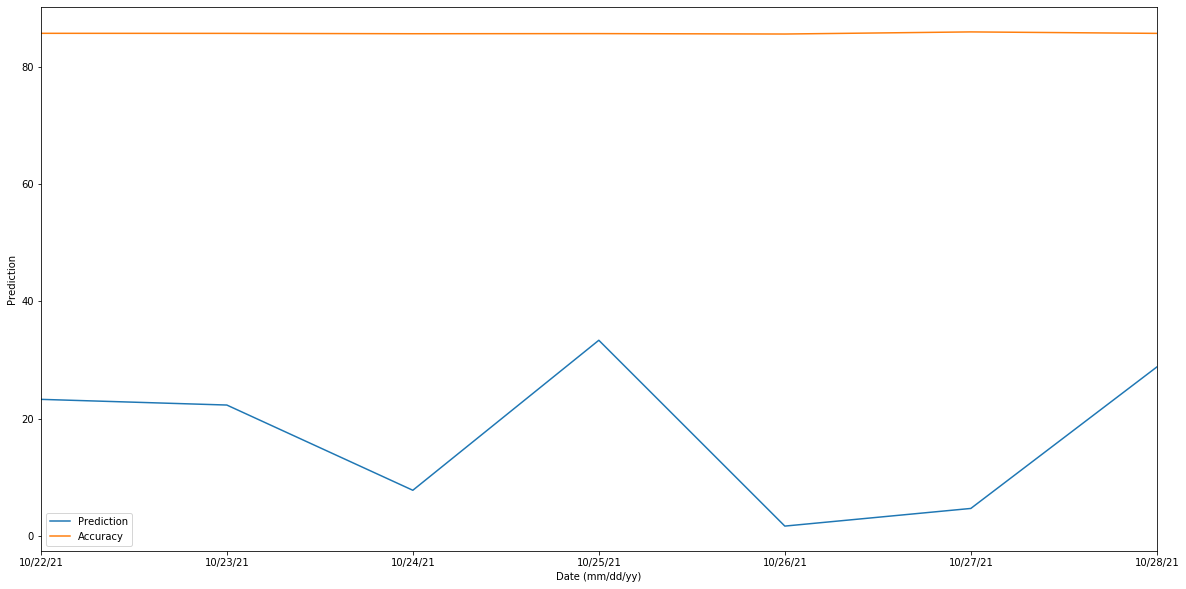

Do you want to save result in csv? (Yes/No) Yes
The data saved as prediction_result.csv!
Do you want to save plot in png? (Yes/No)? Yes
The plot saved as prediction_plot.png! 


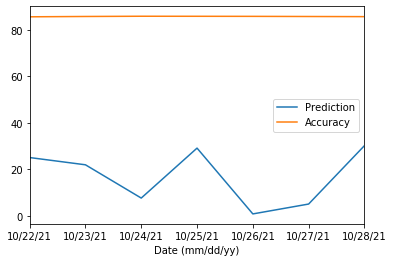

In [42]:
if input('Do you want to use DataFrame? (Yes/No) ') == 'Yes':
    data_csv = pd.read_csv(input('Put csv name: '))
    print(createDFresult())
    createDFplot()
    saveResults()

else:        
    print('Which types of weather parametrs do you have? (Less parameters will affect the accuracy of Machine Learning)')
    Existence_Solar = input('Solar Radiation (Yes/No)')
    Existence_Soil = input('Soil Water Content (Yes/No)')
    Existence_Per = input('Precipitation (Yes/No)')
    Existence_list = [Existence_Solar, Existence_Soil, Existence_Per]

    WindSpeed = float(input('mean wind (m/s):'))
    Temperature = float(input('mean temperature (C):'))
    RelativeHumidity = float(input('mean humidity (%):'))
    
    Precipitation, SoilWaterContent, SolarRadiation = Inputchoice(Existence_list)
    accuracyML, predictML = choosingmachine(Existence_list, Precipitation, RelativeHumidity, SoilWaterContent, SolarRadiation, Temperature, WindSpeed)
    
    printresults()

In [69]:
res_data

,Prediction,Accuracy
Date (mm/dd/yy),,
10/22/21,47.76,71.23
10/23/21,73.86,71.23
10/24/21,16.35,71.23
10/25/21,82.54,71.23
10/26/21,0.00,71.23
10/27/21,1.44,71.23
10/28/21,94.63,71.23
